In [1]:
# Импорт библиотек
import numpy
import pandas as pd

In [2]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_4_NNet/04_NNet_Forecast/04_series")


In [4]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)


In [5]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [6]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

In [7]:
#  Знакомимся с данными
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


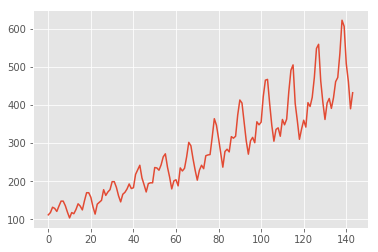

In [8]:
#  График, чтобы ответить на 4 вопроса
ser_g.iloc[:,1].plot()


In [9]:
#  Надо прогнозировать логарифм
ser_g['log_y'] = numpy.log10(ser_g['series_g'])

Text(0,0.5,'log10 от тысяч человек')

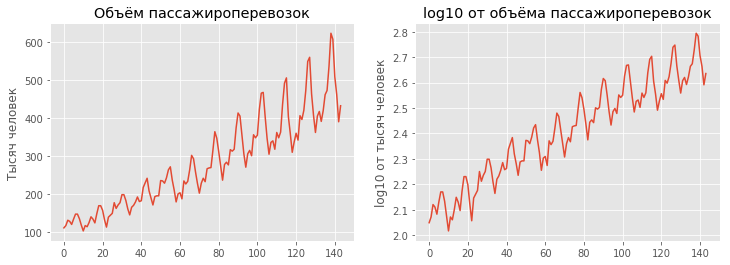

In [10]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [11]:
# Преобразуем данные

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))




        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN  2.049218   
7        NaN       NaN       NaN       NaN       NaN  2.049218  2.071882   
8        NaN       NaN       NaN       NaN  2.049218  2.071882  2.120574   
9        NaN       NaN       NaN  2.049218  2.071882  2.120574  2.110590   
10       NaN       NaN  2.049218  2.071882  2.120574  2.110590  2.082785   
11       NaN  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334   
12  2.049218

In [12]:
ser_g_2.tail(13)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
131,2.527630,2.556303,2.534026,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455
132,2.556303,2.534026,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136
133,2.534026,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177
134,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214
135,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701
136,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942
137,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354
138,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354,2.793790
139,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354,2.793790,2.782473
140,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354,2.793790,2.782473,2.705864


In [13]:
#  Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [14]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

In [15]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

In [16]:
#  Все хорошо?
print(ser_g_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(132, 13)
(120, 12)
(120,)
(12, 12)
(12,)


In [17]:
#  Все хорошо?
print(X_train.head(5))

        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
12  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262   
13  2.071882  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262   
14  2.120574  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539   
15  2.110590  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547   
16  2.082785  2.130334  2.170262  2.170262  2.133539  2.075547  2.017033   

         t-5       t-4       t-3       t-2       t-1  
12  2.170262  2.133539  2.075547  2.017033  2.071882  
13  2.133539  2.075547  2.017033  2.071882  2.060698  
14  2.075547  2.017033  2.071882  2.060698  2.100371  
15  2.017033  2.071882  2.060698  2.100371  2.149219  
16  2.071882  2.060698  2.100371  2.149219  2.130334  


In [18]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [19]:
from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers
from keras import initializers

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
#  Обучение нейронной сети 

#  init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12346)
#  init_3 = initializers.Constant(value = 1e-3)


# Creating a model
#  model = Sequential()
#  model.add(Dense(8, input_dim=12, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
#  model.add(Dense(1, activation='linear', kernel_initializer=init_2, bias_initializer=init_3))

model = Sequential()
model.add(Dense(8, input_dim=12, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
# model.fit(X_train, y_train, epochs=300, batch_size=7)
model.fit(X_train, y_train, epochs=300, batch_size=1)



Epoch 1/300
120/120 [==============================] - 1s 4ms/step - loss: 3.1605 - mean_absolute_percentage_error: 68.8162
Epoch 2/300
120/120 [==============================] - 0s 1ms/step - loss: 0.2875 - mean_absolute_percentage_error: 20.7702
Epoch 3/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0555 - mean_absolute_percentage_error: 7.8246
Epoch 4/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0230 - mean_absolute_percentage_error: 5.1066
Epoch 5/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0188 - mean_absolute_percentage_error: 4.7329
Epoch 6/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0183 - mean_absolute_percentage_error: 4.7124
Epoch 7/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0183 - mean_absolute_percentage_error: 4.7440
Epoch 8/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0183 - mean_absolute_percentage_error: 4.7190
Epoch 9/300
12

120/120 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_absolute_percentage_error: 2.2720
Epoch 67/300
120/120 [==============================] - 0s 925us/step - loss: 0.0064 - mean_absolute_percentage_error: 2.7168
Epoch 68/300
120/120 [==============================] - 0s 925us/step - loss: 0.0057 - mean_absolute_percentage_error: 2.4570
Epoch 69/300
120/120 [==============================] - 0s 925us/step - loss: 0.0047 - mean_absolute_percentage_error: 2.2425
Epoch 70/300
120/120 [==============================] - 0s 950us/step - loss: 0.0058 - mean_absolute_percentage_error: 2.4827
Epoch 71/300
120/120 [==============================] - 0s 967us/step - loss: 0.0045 - mean_absolute_percentage_error: 2.2719
Epoch 72/300
120/120 [==============================] - 0s 933us/step - loss: 0.0047 - mean_absolute_percentage_error: 2.4135
Epoch 73/300
120/120 [==============================] - 0s 942us/step - loss: 0.0047 - mean_absolute_percentage_error: 2.3140
Epoch 7

Epoch 131/300
120/120 [==============================] - 0s 942us/step - loss: 0.0017 - mean_absolute_percentage_error: 1.4436
Epoch 132/300
120/120 [==============================] - 0s 917us/step - loss: 0.0014 - mean_absolute_percentage_error: 1.2673
Epoch 133/300
120/120 [==============================] - 0s 908us/step - loss: 0.0012 - mean_absolute_percentage_error: 1.1446
Epoch 134/300
120/120 [==============================] - 0s 992us/step - loss: 0.0013 - mean_absolute_percentage_error: 1.2090
Epoch 135/300
120/120 [==============================] - 0s 950us/step - loss: 0.0016 - mean_absolute_percentage_error: 1.3334
Epoch 136/300
120/120 [==============================] - 0s 942us/step - loss: 0.0017 - mean_absolute_percentage_error: 1.4167
Epoch 137/300
120/120 [==============================] - 0s 925us/step - loss: 0.0015 - mean_absolute_percentage_error: 1.3057
Epoch 138/300
120/120 [==============================] - 0s 925us/step - loss: 0.0016 - mean_absolute_percentag

120/120 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1407
Epoch 196/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1128
Epoch 197/300
120/120 [==============================] - 0s 942us/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1600
Epoch 198/300
120/120 [==============================] - 0s 942us/step - loss: 9.3756e-04 - mean_absolute_percentage_error: 1.0383
Epoch 199/300
120/120 [==============================] - 0s 942us/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1474
Epoch 200/300
120/120 [==============================] - 0s 925us/step - loss: 8.7430e-04 - mean_absolute_percentage_error: 0.9588
Epoch 201/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_absolute_percentage_error: 1.0936
Epoch 202/300
120/120 [==============================] - 0s 942us/step - loss: 0.0010 - mean_absolute_percentage_error: 1.0

120/120 [==============================] - 0s 1ms/step - loss: 8.9181e-04 - mean_absolute_percentage_error: 0.9989
Epoch 259/300
120/120 [==============================] - 0s 942us/step - loss: 9.9399e-04 - mean_absolute_percentage_error: 1.0372
Epoch 260/300
120/120 [==============================] - 0s 1ms/step - loss: 8.3460e-04 - mean_absolute_percentage_error: 0.9836
Epoch 261/300
120/120 [==============================] - 0s 2ms/step - loss: 9.0882e-04 - mean_absolute_percentage_error: 1.0289
Epoch 262/300
120/120 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_absolute_percentage_error: 1.1122
Epoch 263/300
120/120 [==============================] - 0s 967us/step - loss: 9.7149e-04 - mean_absolute_percentage_error: 1.0009
Epoch 264/300
120/120 [==============================] - 0s 933us/step - loss: 9.0251e-04 - mean_absolute_percentage_error: 1.0305
Epoch 265/300
120/120 [==============================] - 0s 967us/step - loss: 0.0013 - mean_absolute_percent

In [21]:
#  Вариант

##  Обучение нейронной сети 
#
## Creating a model
#model = Sequential()
#model.add(Dense(8, input_dim=12, activation='relu'))
#model.add(Dense(1, activation='linear'))
#
## Compiling model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
#
## Training a model
#model.fit(X_train, y_train, epochs=300, batch_size=None)


In [22]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

12/12 [==============================] - 0s 6ms/step

MAPE: 0.91%


In [23]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [24]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [25]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 12)
(120,)
(12, 12)
(12,)


In [26]:
#   было 144 наблюдений

#   отбросили 12 стало 132
#   train 120
#   test  12



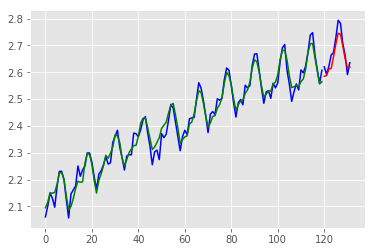

In [27]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = numpy.arange(0, 120, 1)

x3 = numpy.arange(120, 132, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



#   Внимание, недоделано!

#   1.  Есть прогноз на тестовом множестве, нет прогноза.
#   2.  Есть прогноз для логарифма, нет прогноза для исходного ряда.
#   3.  Нет окончательного графика.
#   4.  Нет спрогнозированных значений
